<a href="https://colab.research.google.com/github/Vika77-kuromi/Statt-Testing/blob/main/PolicyTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install langchain langchain-core langchain_community langgraph langchain-huggingface transformers torch

  Using cached langgraph-0.3.5-py3-none-any.whl.metadata (17 kB)
  Using cached langchain_huggingface-0.1.2-py3-none-any.whl.metadata (1.3 kB)
  Using cached langgraph_checkpoint-2.0.18-py3-none-any.whl.metadata (4.6 kB)
  Using cached langgraph_prebuilt-0.1.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached langgraph_sdk-0.1.55-py3-none-any.whl.metadata (1.8 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached langgraph-0.3.5-py3-none-any.whl (131 kB)
Using cached langchain_huggingface-0.1.2-py3-none-any.whl (21 kB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
Using cached langgraph_checkpoint-2.0.18-py3-none-any.whl (39 kB)
Using cached langgraph_prebuilt-0.1.2-py3-none-any.whl (24 kB)
Using cached langgr

In [6]:
! pip install langchain_community

In [7]:
! pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 4.0 MB/s eta 0:00:00


In [8]:
from langchain_community.document_loaders import PyPDFLoader


# list of local PDF paths
local_pdf_paths = [
    "https://www.commerce.gov/sites/default/files/2025-03/DOC-Enterprise-Cybersecurity-Policy-1-1.pdf",
    "https://www.commerce.gov/sites/default/files/2025-03/Security-and-Privacy-Assessment-and-Authorization-Handbook-v1-1.pdf",
    'https://www.commerce.gov/sites/default/files/2022-02/OCIO-IT-Policy-Development-Policy.pdf',
    'https://www.commerce.gov/sites/default/files/2022-02/Internet-Protocol-Version-6-Policy.pdf',
    'https://www.commerce.gov/sites/default/files/2022-02/IT-Product-Maintenance-Support-End-of-Life-Cycle-Mgt.pdf',
    'https://www.commerce.gov/sites/default/files/2022-02/Controlled-Unclassified-Information-Policy.pdf'
]

pdf_docs =[]
# load PDFs into LangChain
for path in local_pdf_paths:
    loader = PyPDFLoader(path)
    pdf_docs.extend(loader.load())

# print to check
print(pdf_docs[0].page_content[:1000])


Department of Commerce  
E
nterprise Cybersecurity Policy (ECP)  
Office of Cybersecurity and  
IT Risk Management (OCRM)  
O
ffice of the Chief Information Officer (OCIO)  
September 2022 
Version 1.1


In [9]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# break the documents to different chunks

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(pdf_docs)

# check the number of chunks
len(all_splits)

516

In [10]:
!pip install langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.4 MB/s eta 0

In [11]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.41
    Uninstalling langchain-core-0.3.41:
      Successfully uninstalled langchain-core-0.3.41


In [12]:
! pip install dotenv

In [17]:
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv

# load .env file with my api key
load_dotenv()

openai_api_key = os.getenv("OPENAI_API_KEY")

llm = ChatOpenAI(
    model="gpt-4",
    temperature=0,
    request_timeout=30,
    api_key=openai_api_key
)




In [18]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_chroma import Chroma
from langchain_core.documents import Document

# use OpenAI's embedding model to convert text into vector embeddings
openai_embeddings = OpenAIEmbeddings(api_key=openai_api_key)

# convert the text documents (chunks) into a vectorstore using Chroma
vectorstore = Chroma.from_documents(documents=all_splits, embedding=openai_embeddings)


In [34]:
from typing_extensions import List, TypedDict
from langchain.prompts import PromptTemplate

# design the prompt template
prompt = PromptTemplate(
    input_variables=["context", "question"],
    template="""
You are a policy assistant that provides concise and accurate answers based on official government documents.

Context:
{context}

Question: {question}

Provide a well-structured and informative answer below. Make sure to fully answer the question:

Answer:
"""
)


# define a dictionary structure to store application state
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

# define the retrieve logic for the model
def retrieve(state: State):
    retrieved_docs = vectorstore.similarity_search(state["question"], k=3)
    return {"context": retrieved_docs}


# define the answer generation function
def generate(state: State):
    # combine all retrieved document text into a single string
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])

    formatted_prompt = prompt.format(question=state["question"], context=docs_content)
    response = llm.invoke(formatted_prompt)
    return {"answer": response}




In [20]:
! pip install langgraph

In [35]:
from langgraph.graph import START, StateGraph

# built the workflow
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()


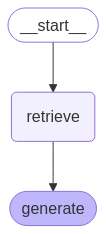

In [34]:
# show the running logic
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [36]:
import gradio as gr

def chatbot_response(user_question):
    response = graph.invoke({"question": user_question})
    return response["answer"].content

# create a Gradio Interface
chatbot_ui = gr.Interface(
    fn=chatbot_response,
    inputs=gr.Textbox(lines=2, placeholder="Ask a policy question..."),
    outputs="text",
    title="Policy Chatbot",
    description="Ask questions about internet commerce policies.",
)


chatbot_ui.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3e81af64ac9330457c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [37]:
pip freeze > requirements.txt


In [38]:
from google.colab import files
files.download("requirements.txt")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
!echo ".env" >> .gitignore
!echo "__pycache__/" >> .gitignore
!echo "*.log" >> .gitignore
!echo "*.zip" >> .gitignore
